In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
%matplotlib inline

In [4]:
def show(image):
    plt.figure(dpi=100, figsize=(7,7))
    plt.axis('off')
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)

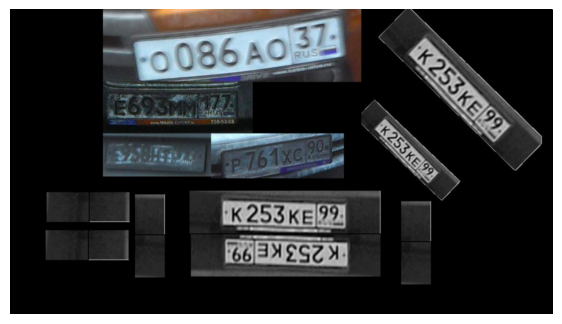

In [3]:
image = cv2.imread("numbers.png")
show(image)

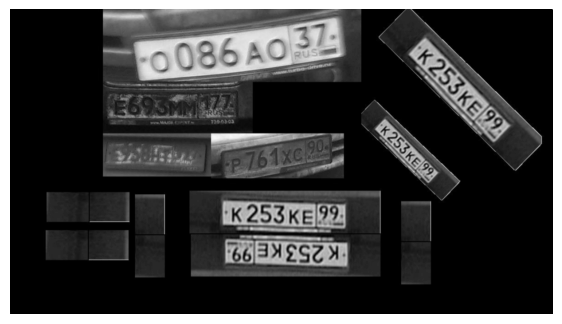

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayM = gray.copy()
show(gray)

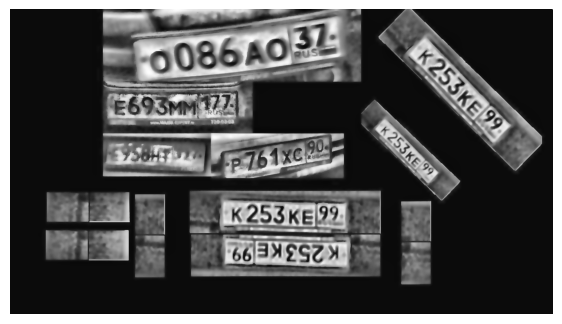

In [6]:
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20, 20))#эквилизация гистограммы Contrast Limited Adaptive Histogram Equalization
gray = clahe.apply(gray)
gray = cv2.bilateralFilter(gray, 9, 50, 50)#двусторонняя фильтрация с сохранением краев https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
show(gray)
grayCopies = gray.copy()

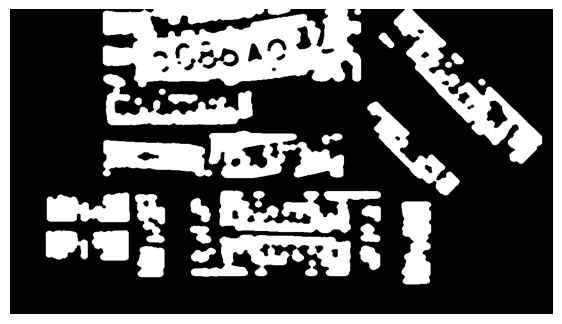

In [6]:
_, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13)))#13
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))#
show_gray(gray)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

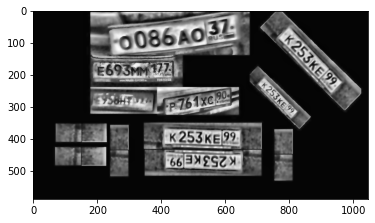

In [7]:
plt.imshow(grayCopies, cmap='gray')

Распознано номеров:  8


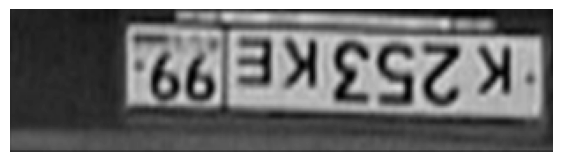

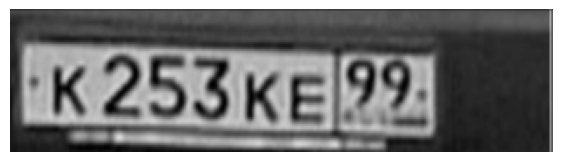

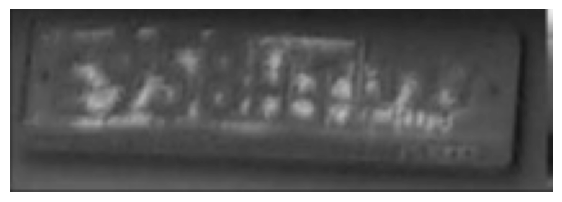

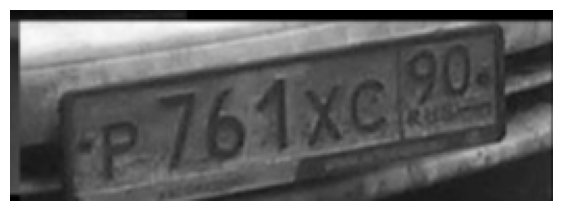

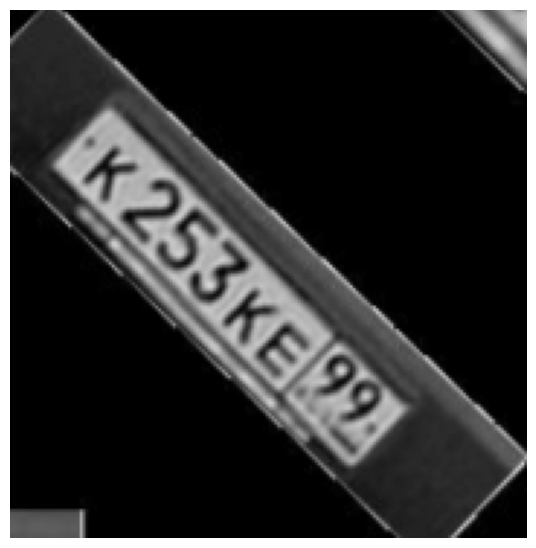

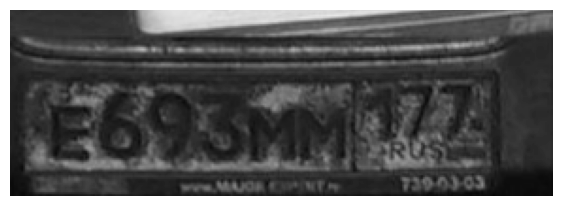

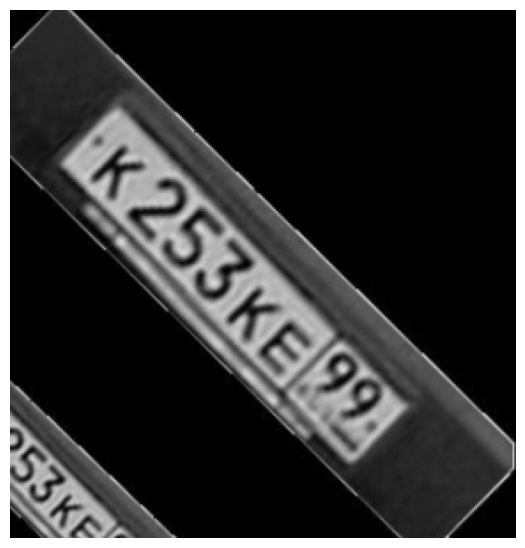

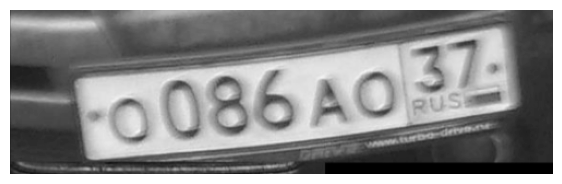

In [8]:
grayMCopy = grayM.copy()
images = []
index = 0
for c in contours:
    square = cv2.contourArea(c)
    if (square > 7500):
        x, y, w, h = cv2.boundingRect(c)
        
        if(index == 0):
            grayCopies[y: y + h, x: x + w] = cv2.flip(grayCopies[y: y + h, x: x + w],-180)
            index+=1
        number = grayMCopy[y: y + h, x: x + w]#orig_gray[y: y + h, x: x + w]  //grayM
        images.append(number)
        show_gray(number)
print('Распознано номеров: ', len(images))

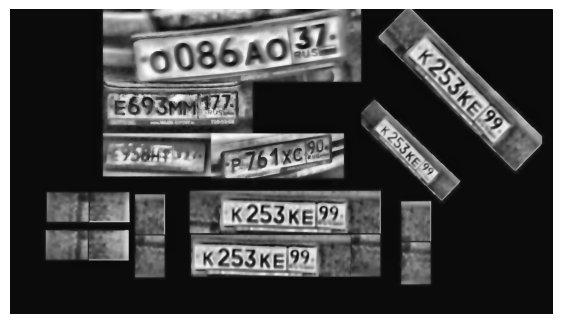

In [9]:
show(grayCopies)

In [10]:
NOMEROFF_NET_DIR = os.path.abspath('/')

sys.path.append(NOMEROFF_NET_DIR)

In [11]:
from NomeroffNet.YoloV5Detector import Detector
detector = Detector()
detector.load()

YOLOv5  v6.0-80-g27bf428 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients


In [12]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints
npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (C:\Users\PikaFun\Desktop\part4\NomeroffNet\tools\../../data\./models\NpPointsCraft\craft_mlt\craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (C:\Users\PikaFun\Desktop\part4\NomeroffNet\tools\../../data\./models\NpPointsCraft\craft_refiner\craft_refiner_CTW1500_2020-02-16.pth)


In [13]:
from NomeroffNet.TextDetector import TextDetector
from NomeroffNet.TextPostprocessing import textPostprocessing

textDetector = TextDetector.get_static_module("ru")
textDetector.load("latest")

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [14]:
from NomeroffNet.OptionsDetector import OptionsDetector

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [15]:
img=cv2.cvtColor(grayCopies, cv2.COLOR_BGR2RGB)#gray

targetBoxes = detector.detect_bbox(img)
all_points = npPointsCraft.detect(img, targetBoxes,[5,2,0])

# cut zones
zonesRGB = [getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points]
zones = convertCvZonesRGBtoBGR(zonesRGB)

# predict zones attributes 
regionIds, countLines = optionsDetector.predict(zones)
regionNames = optionsDetector.getRegionLabels(regionIds)
print(regionNames)

# find text with postprocessing by standart
textArr = textDetector.predict(zones)
textArr = textPostprocessing(textArr, regionNames)
print(textArr)

C:\Users\PikaFun\Desktop\part4\NomeroffNet\tools\../../data\./repos\NpPointsCraft\craft_mlt\craft_utils.py:239: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys = np.array(polys)
C:\Users\PikaFun\Desktop\part4\NomeroffNet\nnmodels\numberplate_options_model.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
C:\Users\PikaFun\Desktop\part4\NomeroffNet\nnmodels\numberplate_options_model.py:108: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))


['ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru']
['O086AO37', 'P761XC90', 'K253KE99', 'K253KE99', 'K253KE99', 'K253KE99', 'E693MM77']


C:\Users\PikaFun\Desktop\part4\NomeroffNet\TextDetectors\base\ocr.py:233: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  pred_texts = decode_batch(torch.Tensor(net_out_value), self.label_converter)
